In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

In [7]:
df = pd.read_csv('student-mat.csv')

# Clean up column names
df.columns = df.columns.str.strip()

# Show column names and first few rows
print(df.columns.tolist())
df.head()

['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3']


,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [8]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Check shape of the dataset
print("\nShape of dataset:", df.shape)

Missing values:
 school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    0
dtype: int64

Data types:
 school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    object
dtype: object

Shape of dataset: (395, 1)


In [9]:
# Drop duplicate rows
df = df.drop_duplicates()

# Check again for missing values
df.isnull().sum()

school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    0
dtype: int64

In [6]:
print(df.columns.tolist())

['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3']


In [13]:
df = pd.read_csv('student-mat.csv', sep=';')

In [14]:
# Load dataset with correct separator
df = pd.read_csv('student-mat.csv', sep=';')

# Clean column names
df.columns = df.columns.str.strip()

# Check columns to confirm it's fixed
print(df.columns.tolist())

# Display first few rows
df.head()

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [15]:
average_g3 = df['G3'].mean()
print("Average final grade (G3):", round(average_g3, 2))


Average final grade (G3): 10.42


In [16]:
high_scores = df[df['G3'] > 15]
print("Number of students scoring above 15 in G3:", len(high_scores))

Number of students scoring above 15 in G3: 40


In [17]:
correlation = df['studytime'].corr(df['G3'])
print("Correlation between study time and G3:", round(correlation, 2))

Correlation between study time and G3: 0.1


In [18]:
gender_avg = df.groupby('sex')['G3'].mean()
print("Average G3 by gender:\n", gender_avg)

higher_gender = gender_avg.idxmax()
print(f"\nGender with higher average final grade: {higher_gender}")

Average G3 by gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

Gender with higher average final grade: M


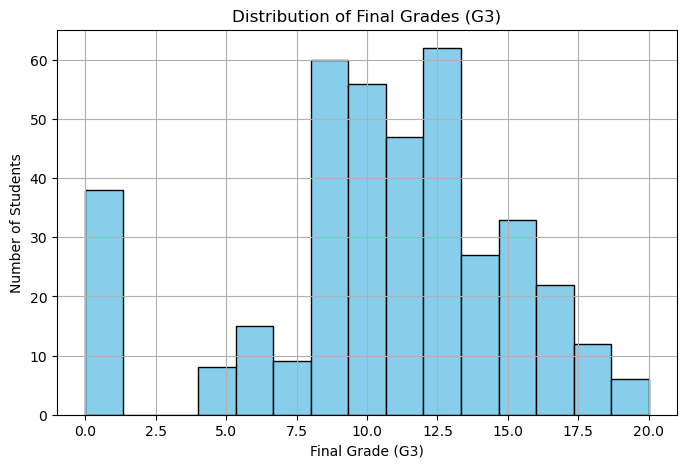

In [19]:
plt.figure(figsize=(8, 5))
plt.hist(df['G3'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

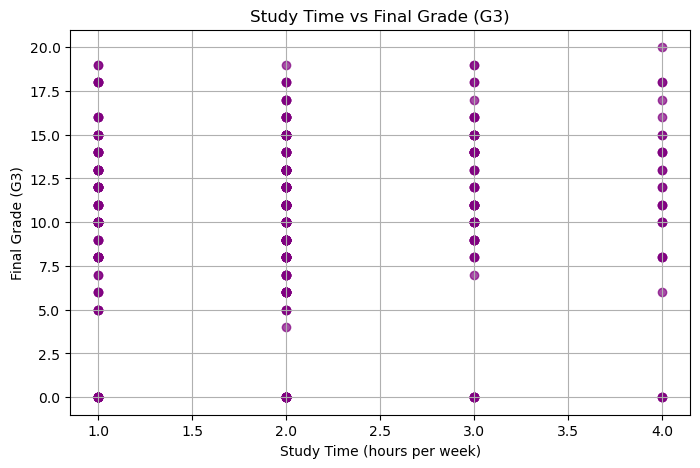

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(df['studytime'], df['G3'], alpha=0.7, color='purple')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time (hours per week)')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()

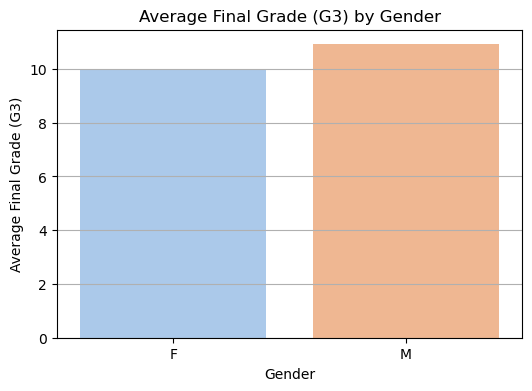

In [21]:
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_avg.index, y=gender_avg.values, palette='pastel')
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.grid(True, axis='y')
plt.show()